### Exploratory data analysis

- In this dataset, we aim at having a look at the data and figuring out what features can be used for modeling

In [ ]:
# https://towardsdatascience.com/consistently-beautiful-visualizations-with-altair-themes-c7f9f889602 

In [61]:
import pandas as pd 
import altair as alt
import numpy as np
from collections import Counter as cnt
import random 
import seaborn as sns 
import matplotlib.pyplot as plt
# import urban_theme

In [39]:
# alt.themes.register("my_custom_theme", urban_theme)  # this is to make use of altair theme (urban theme) that I have downloaded
# alt.themes.enable("my_custom_theme")

In [5]:
# data = pd.read_csv('../../../AprOct15_trimmed.csv')

In [3]:
# data.shape

NameError: name 'data' is not defined

In [4]:
data15 = pd.read_csv('../../../AprOct15_trimmed.csv', index_col = 0, skiprows = lambda i: i>0 and random.random() > 0.0001)
data16 = pd.read_csv('../../../JanOct16_trimmed.csv', index_col = 0, skiprows = lambda i: i>0 and random.random() > 0.0001)
data17 = pd.read_csv('../../../JanOct17_trimmed.csv', index_col = 0, skiprows = lambda i: i>0 and random.random() > 0.0001)
data18 = pd.read_csv('../../../JanOct18_trimmed.csv', index_col = 0, skiprows = lambda i: i>0 and random.random() > 0.0001)

In [38]:
# data15 = pd.read_csv('../../../AprOct15_trimmed.csv')

In [39]:
# data16 = pd.read_csv('../../../JanOct16_trimmed.csv')

In [40]:
# data17 = pd.read_csv('../../../JanOct17_trimmed.csv')

In [ ]:
# data18 = pd.read_csv('../../../JanOct18_trimmed.csv')

In [6]:
data = pd.concat([data15, data16, data17, data18])

In [8]:
data.shape

(23830, 31)

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
data = data.iloc[:,1:]

In [11]:
data.head()

,STORE_ID,TRAN_ID,DATE,ARTICLE_ID,INDIV_ID,VEHICLE_ID,UNITS,SALES,STATE_CODE,ZIP_CODE,MSA,MAKE,MODEL,SUB_MODEL,MODEL_YEAR,PROD_GROUP_CODE,PROD_GROUP_DESC,CATEGORY_CODE,CATEGORY_DESC,SEGMENT_CODE,SEGMENT_DESC,CLASS_CODE,CLASS_DESC,DISCOUNT_FLAG,CROSS_SECTION,ASPECT_RATIO,RIM_SIZE,EMAIL_OPTIN_IND,AH1_RES_BUS_INDC,SUPP1_BUS_PANDER
12028,227600,991055650,2015-04-15,7006016,258724282.0,938410713,0.0,-7.50,IN,47374,NaN,FORD,ESCORT SE,SE,1998.0,4.0,Services,62.0,Tire Services,91.0,Tire Services,147.0,Balance,Y,NaN,NaN,NaN,Y,R,N
27213,15601,992338170,2015-04-04,7001674,303471739.0,938166247,0.0,-0.66,IL,60173,"CHICAGO,IL",KIA,OPTIMA EX,NaN,2015.0,4.0,Services,74.0,Engine Systems,106.0,Lubrication Services,389.0,Oil Change,Y,NaN,NaN,NaN,Y,R,N
86144,328309,990765470,2015-04-27,7046930,543569204.0,923086001,0.0,0.00,OK,73503,"LAWTON,OK",FORD,FLEX LIMITED,Limited,2009.0,4.0,Services,81.0,Miscellaneous Services,109.0,Inspection Services,473.0,Courtesy Check,N,NaN,NaN,NaN,Y,R,N
94601,328315,990771980,2015-04-02,7046930,500833541.0,933373111,0.0,0.00,UT,84056,"OGDEN, UT",BMW,330I BASE,w/Sport Pkg.,2006.0,4.0,Services,81.0,Miscellaneous Services,109.0,Inspection Services,473.0,Courtesy Check,N,NaN,NaN,NaN,Y,R,N
98365,7056,991583160,2015-04-11,7001708,543114638.0,909695656,0.0,0.00,MD,20737,WASHINGTON,MAZDA,CX-9 GRAND TOURING,Grand Touring,2010.0,4.0,Services,73.0,Brake Systems,102.0,Brake Service,521.0,Basic Brake Job Labor,Y,NaN,NaN,NaN,Y,R,N


In [12]:
data['label'] = np.where(data['PROD_GROUP_CODE'] == 5, 1, 0)

In [13]:
cnt(data.label)

Counter({0: 22321, 1: 1509})

## Group by year and see trends for sales

In [14]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [15]:
data['year'] = pd.DatetimeIndex(data['DATE']).year
data['month'] = pd.DatetimeIndex(data['DATE']).month

In [123]:
year_sales = data.groupby('year').agg({'SALES' : 'mean'}).reset_index()

In [124]:
year_sales

,year,SALES
0,2015,17.839470
1,2016,19.164286
2,2017,19.858851
3,2018,20.316027


In [131]:
year_sales['year']

0    2015
1    2016
2    2017
3    2018
Name: year, dtype: int64

## Customizing seaborn style

In [142]:
sns.set(style='darkgrid', context='talk', palette='rainbow')
plt.rcParams["figure.figsize"] = (10, 8)

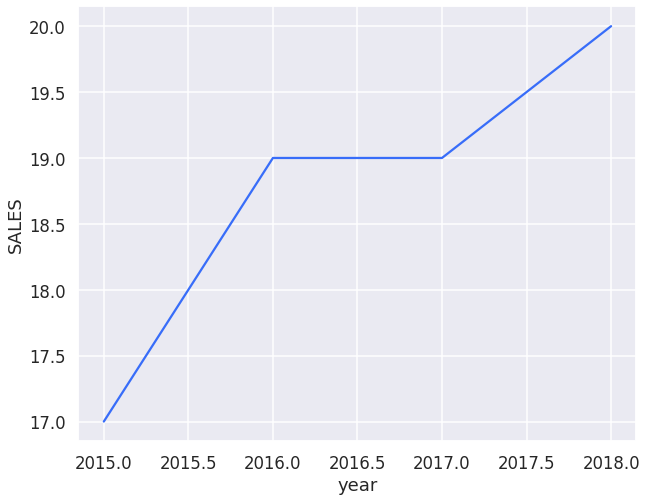

In [144]:
# alt.Chart(year_sales).mark_line().encode(
#     x='year:N',
#     y='SALES:Q', 
#     tooltip = ['year:N', 'SALES:Q']
# ).properties(
#     width=800,
#     height=200
# ).interactive()
year_sales['SALES'] = year_sales['SALES'].astype('float')
sns.lineplot(data = year_sales, x = 'year', y = 'SALES');
# plt.yaxis.set_major_locator(MaxNLocator(integer=True))
# from matplotlib.ticker import MaxNLocator

# ax = fig.gca()
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))

## Group by month and see trends for sales

In [169]:
month_sales = data.query('PROD_GROUP_CODE == 5').groupby('month').agg({'SALES' : 'mean'}).reset_index()

In [170]:
month_sales

,month,SALES
0,1,67.210088
1,2,99.439444
2,3,97.556441
3,4,97.815263
4,5,113.432747
5,6,90.655870
6,7,100.819645
7,8,85.158480
8,9,96.553436
9,10,97.624684


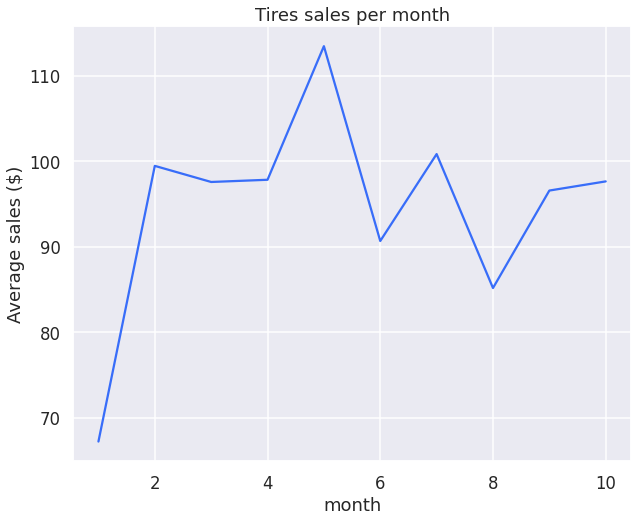

In [176]:
# alt.Chart(month_sales).mark_line().encode(
#     x='month:O',
#     y='SALES:Q'
# ).properties(
#     width=800,
#     height=200
# ).interactive()
sns.lineplot(data = month_sales, x = 'month', y = 'SALES');
plt.title('Tires sales per month')
plt.ylabel('Average sales ($)');

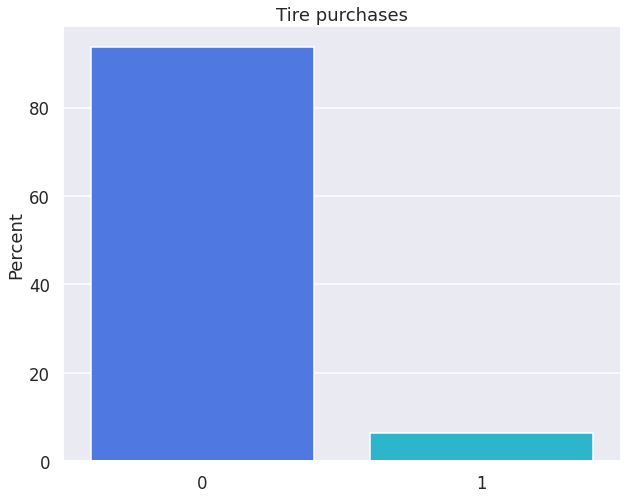

In [175]:
# sns.countplot(data = data, x = 'label')
# plt.xlabel('Tire purcahse');

ax = sns.barplot(x="label", y="label", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Percent")
plt.title('Tire purchases')
plt.xlabel('');

## Does the car model affect tire purchase

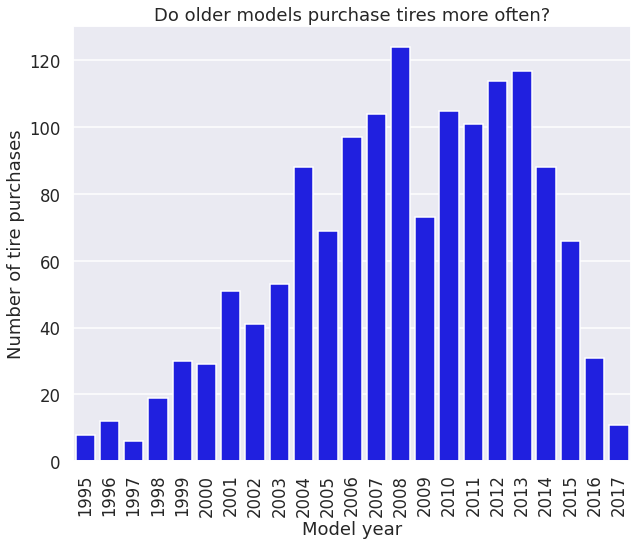

In [181]:
# alt.Chart(data).mark_line().encode(
#     x='MODEL_YEAR:O',
#     y='label:N'
# )
model_tire_purch = data.groupby('MODEL_YEAR').agg({'label': 'sum'}).reset_index().query('label > 4')
model_tire_purch['MODEL_YEAR'] = model_tire_purch['MODEL_YEAR'].astype('int')
sns.barplot(data = model_tire_purch, x = 'MODEL_YEAR', y = 'label', color = 'blue')
plt.xlabel("Model year")
plt.xticks(rotation=90)
plt.ylabel('Number of tire purchases')
plt.title('Do older models purchase tires more often?');

## FEATURE: top make according to proportion that purchase a tire

first I am creating a column of all transactions that included purchasing a tire in the past

In [153]:
data['tire_purchase'] = np.where((data['PROD_GROUP_DESC'] == "Tires") & (data['SEGMENT_DESC'] != "Others"), 1, 0)

In [154]:
df2 = data.groupby(['MAKE', 'tire_purchase']).agg({'tire_purchase': 'count'})
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df3.columns = ['total'] # I need to rename the column to handle multiindex caused by groupby 

In [155]:
top_make_tires_purch_prop = df3.reset_index().query('tire_purchase == 1').sort_values(by = 'total', ascending = False).nlargest(int(len(df3)/10), columns = 'total')

In [156]:
top_make_tires_purch_prop

,MAKE,tire_purchase,total
23,FREIGHTLINER,1,100.000000
35,Honda,1,50.000000
94,Volkswagen,1,33.333333
26,GEO,1,20.000000
55,MERCEDES-BENZ,1,17.592593
60,MINI,1,15.909091
5,BMW,1,14.159292
20,FIAT,1,13.333333
40,JAGUAR,1,10.000000


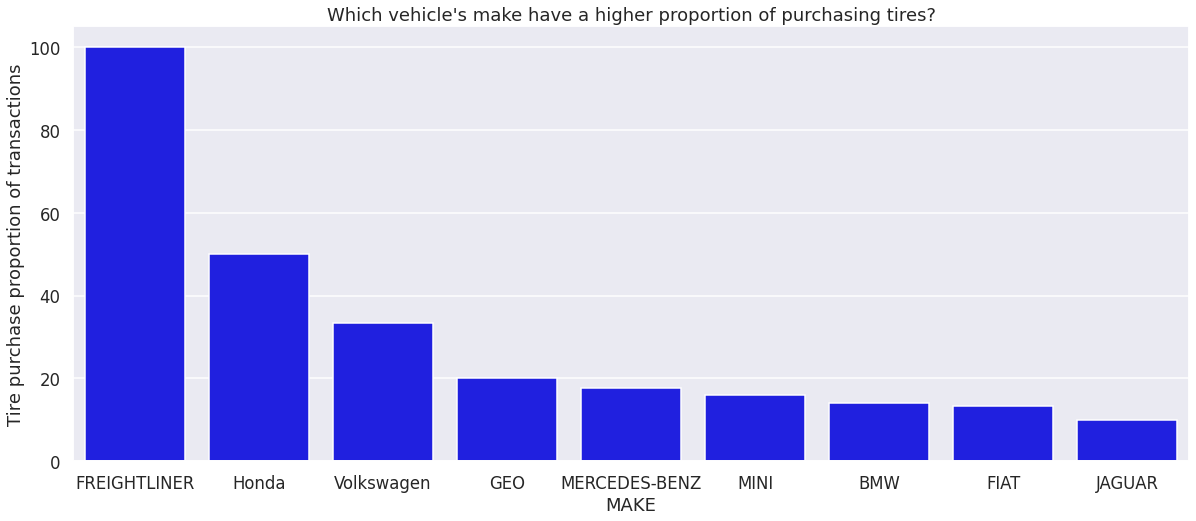

In [188]:
plt.figure(figsize = (20,8));
sns.barplot(data = top_make_tires_purch_prop, x = 'MAKE', y = 'total', color = 'blue')
plt.ylabel('Tire purchase proportion of transactions');
plt.title("Which vehicle's make have a higher proportion of purchasing tires?");

## FEATURE: top model according to proportion that purchases a tire

In [158]:
df2 = data.groupby(['MODEL', 'tire_purchase']).agg({'tire_purchase': 'count'})
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df3.columns = ['total'] # I need to rename the column to handle multiindex caused by groupby 

In [159]:
top_MODEL_tires_purch_prop = df3.reset_index().query('tire_purchase == 1').sort_values(by = 'total', ascending = False).nlargest(int(len(df3)/10), columns = 'total')

In [168]:
# plt.figure(figsize = (20,8));
# sns.barplot(data = top_MODEL_tires_purch_prop.head(10), x = 'MODEL', y = 'total', color = 'blue')
# plt.ylabel('Tire purchase proportion of transactions');

## FEATURE: top sub_model according to proportion that purchase a tire

In [164]:
df2 = data.groupby(['SUB_MODEL', 'tire_purchase']).agg({'tire_purchase': 'count'})
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df3.columns = ['total'] # I need to rename the column to handle multiindex caused by groupby 

In [165]:
top_SUB_MODEL_tires_purch_prop = df3.reset_index().query('tire_purchase == 1').sort_values(by = 'total', ascending = False).nlargest(int(len(df3)/10), columns = 'total')

In [167]:
# sns.barplot(data = top_SUB_MODEL_tires_purch_prop.head(10), x = 'SUB_MODEL', y = 'total', color = 'blue')
# plt.ylabel('Tire purchase proportion of transactions');